In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import gc
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files 

uploaded = files.upload()

Saving jobss.csv to jobss (3).csv


In [ ]:
data_jobs = pd.read_csv('jobss.csv')
print("\n Vista del Dataset: \n")
data_jobs.head() #visualizacion primeros datos del dataset


 Vista del Dataset: 



,Job Title,Unnamed: 1,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal
0,Digital Media Planner,NaN,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,72.877393,19.075990,3855
1,Online Bidding Executive,NaN,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,73.854454,18.521428,2639
2,Trainee Research/ Research Executive- Hi- Tec...,NaN,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,77.002700,28.428262,2156
3,Technical Support,NaN,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,72.877393,19.075990,4059
4,Software Test Engineer -hyderabad,NaN,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,78.474061,17.360589,5347


In [ ]:
data_jobs.describe()

,Unnamed: 1,Longitude,Latitude,sal
count,0.0,473.000000,473.000000,500.000000
mean,NaN,75.988498,21.089736,4224.594000
std,NaN,14.397788,7.080071,1598.716696
min,NaN,-79.030572,-8.123729,1510.000000
25%,NaN,73.854454,17.360589,2864.250000
50%,NaN,77.121215,19.075990,4213.000000
75%,NaN,77.590082,28.428262,5623.000000
max,NaN,121.097753,46.314475,6991.000000


In [ ]:
data_jobs.drop("Unnamed: 1", axis=1, inplace=True) #removes the specified column, because most values are NaN and it's not important info
data_jobs.head()

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal
0,Digital Media Planner,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,72.877393,19.075990,3855
1,Online Bidding Executive,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,73.854454,18.521428,2639
2,Trainee Research/ Research Executive- Hi- Tec...,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,77.002700,28.428262,2156
3,Technical Support,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,72.877393,19.075990,4059
4,Software Test Engineer -hyderabad,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,78.474061,17.360589,5347


In [ ]:
data_jobs.loc[:, 'Longitude':].describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')\
                            .background_gradient(subset=['min'], cmap='summer')

,count,mean,std,min,25%,50%,75%,max
Longitude,473.000000,75.988498,14.397788,-79.030572,73.854454,77.121215,77.590082,121.097753
Latitude,473.000000,21.089736,7.080071,-8.123729,17.360589,19.075990,28.428262,46.314475
sal,500.000000,4224.594000,1598.716696,1510.000000,2864.250000,4213.000000,5623.000000,6991.000000


In [ ]:
data_jobs.info() #recuento info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                489 non-null    object 
 1   Job Experience Required  500 non-null    object 
 2   Key Skills               500 non-null    object 
 3   Role Category            463 non-null    object 
 4   Location                 489 non-null    object 
 5   Functional Area          489 non-null    object 
 6   Industry                 489 non-null    object 
 7   Role                     486 non-null    object 
 8   Longitude                473 non-null    float64
 9   Latitude                 473 non-null    float64
 10  sal                      500 non-null    int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 43.1+ KB


In [ ]:
data_jobs.shape #(filas, columnas)

(500, 11)

In [ ]:
data_jobs.isnull().sum() #returns the number of missing values in the data set.

Job Title                  11
Job Experience Required     0
Key Skills                  0
Role Category              37
Location                   11
Functional Area            11
Industry                   11
Role                       14
Longitude                  27
Latitude                   27
sal                         0
dtype: int64

In [ ]:
data_jobs[data_jobs["Location"].isnull().values==True]

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal
59,NaN,vide,Marketing|Executive|Marketing|Marketing|Execut...,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,2709
62,NaN,vide,Manager|Transformation|Manager|Transformation|...,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,3764
116,NaN,vide,vide,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,6431
168,NaN,vide,vide,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,6449
172,NaN,vide,Sales|Counter|Sales|Sales|Sales|Sales|Counter|...,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,4015
186,NaN,vide,vide,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,4662
212,NaN,vide,vide,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,1660
277,NaN,vide,networking|Network|Lead|Network|Lead|Network|N...,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,4450
441,NaN,vide,Java|Trainer|Java|trainer|Trainer|java|Trainer...,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,6310
467,NaN,vide,vide,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,5477


In [ ]:
data_jobs.dropna(axis=0, subset=["Location"], inplace=True)
data_jobs.isnull().sum()

Job Title                   0
Job Experience Required     0
Key Skills                  0
Role Category              26
Location                    0
Functional Area             0
Industry                    0
Role                        3
Longitude                  27
Latitude                   27
sal                         0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job Title                      489 non-null    int64  
 1   Job Experience Required        489 non-null    int64  
 2   Key Skills                     489 non-null    int64  
 3   Role Category                  488 non-null    float64
 4   Location                       489 non-null    int64  
 5   Functional Area                489 non-null    int64  
 6   Industry                       489 non-null    int64  
 7   Role                           488 non-null    float64
 8   Longitude                      462 non-null    float64
 9   Latitude                       462 non-null    float64
 10  sal                            489 non-null    int64  
 11  Job Title_count                489 non-null    int64  
 12  Job Experience Required_count  489 non-null    int

In [ ]:
data_jobs["Job Title"].value_counts()

 Business Development Manager                                  4
 Java Developer                                                3
 PHP Developer                                                 3
 Key Accounts Manager                                          2
 Sales Executive                                               2
                                                              ..
Java Enterprise Edition                                        1
 Inbound Phone Banking Voice Process - Leading Bank - Noida    1
 Software Development / Software Engineer                      1
 Technical / Functional Skills                                 1
 Tech caller hiring a huge number of Executives.               1
Name: Job Title, Length: 471, dtype: int64

In [ ]:
# Transform data into Discrete features
feas = ["Job Title", "Job Experience Required", "Key Skills", "Role Category", "Location", "Functional Area","Industry","Role"]

for col in tqdm(feas):
    map_dict = dict(zip(data_jobs[col].unique(), range(data_jobs[col].nunique())))
    # label enc
    data_jobs[col] = data_jobs[col].map(map_dict)
    # count enc
    data_jobs[f'{col}_count'] = data_jobs[col].map(data_jobs[col].value_counts())

data_jobs.head()

  0%|          | 0/8 [00:00<?, ?it/s]

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal,Job Title_count,Job Experience Required_count,Key Skills_count,Role Category_count,Location_count,Functional Area_count,Industry_count,Role_count
0,0,0,0,0.0,0,0,0,0.0,72.877393,19.075990,3855,1,26,1,3.0,58,13,10,1.0
1,1,1,1,1.0,1,1,1,1.0,73.854454,18.521428,2639,1,32,1,35.0,1,74,187,16.0
2,2,2,2,2.0,2,2,2,2.0,77.002700,28.428262,2156,1,16,1,3.0,38,10,42,1.0
3,3,3,3,3.0,0,3,1,3.0,72.877393,19.075990,4059,1,7,1,15.0,58,119,187,6.0
4,4,1,4,4.0,3,4,1,4.0,78.474061,17.360589,5347,1,32,1,130.0,37,7,187,7.0


In [ ]:
df= pd.DataFrame(data=data_jobs)
from google.colab import files
df.to_csv('discrete_jobs.csv', index=False) 
files.download('discrete_jobs.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [212]:
from google.colab import files 

uploaded = files.upload()

Saving discrete_jobs.csv to discrete_jobs (2).csv


In [213]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, train_test_split, KFold
from sklearn.metrics import roc_auc_score, mean_squared_error, confusion_matrix, mean_absolute_error
#from bayes_opt import BayesianOptimization
#import scikitplot as skplt
import lightgbm as lgb

Modelo

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric

from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn import svm
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [215]:
dataframe = pd.read_csv('discrete_jobs.csv')
dataframe.head(-5)

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal,Job Title_count,Job Experience Required_count,Key Skills_count,Role Category_count,Location_count,Functional Area_count,Industry_count,Role_count
0,0,0,0,0.0,0,0,0,0.0,72.877393,19.075990,3855,1,26,1,3.0,58,13,10,1.0
1,1,1,1,1.0,1,1,1,1.0,73.854454,18.521428,2639,1,32,1,35.0,1,74,187,16.0
2,2,2,2,2.0,2,2,2,2.0,77.002700,28.428262,2156,1,16,1,3.0,38,10,42,1.0
3,3,3,3,3.0,0,3,1,3.0,72.877393,19.075990,4059,1,7,1,15.0,58,119,187,6.0
4,4,1,4,4.0,3,4,1,4.0,78.474061,17.360589,5347,1,32,1,130.0,37,7,187,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,462,26,31,21.0,0,19,19,NaN,72.877393,19.075990,1617,1,9,16,15.0,58,21,8,NaN
480,463,0,459,24.0,0,21,16,94.0,72.877393,19.075990,4164,1,26,1,6.0,58,6,8,4.0
481,464,33,460,6.0,0,5,1,27.0,72.877393,19.075990,5777,1,18,1,43.0,58,57,187,33.0
482,465,29,461,4.0,4,3,1,11.0,73.854454,18.521428,4016,1,22,1,130.0,45,119,187,96.0


In [282]:
X = dataframe[[ 'Key Skills', 'Job Experience Required']].values 
y = dataframe['Job Title'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

scaler = StandardScaler()# Ejercicio, no use la escalización de los datos a ver que tal funciona!
scaler.fit(X_train)# el fit de los datos solo se hace con el conjunto de entrenamiento!
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

"""
scaler = MinMaxScaler()# Ejercicio, no use la escalización de los datos a ver que tal funciona!
scaler.fit(X_train)# el fit de los datos solo se hace con el conjunto de entrenamiento!
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
"""

'\nscaler = MinMaxScaler()# Ejercicio, no use la escalización de los datos a ver que tal funciona!\nscaler.fit(X_train)# el fit de los datos solo se hace con el conjunto de entrenamiento!\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)\n'

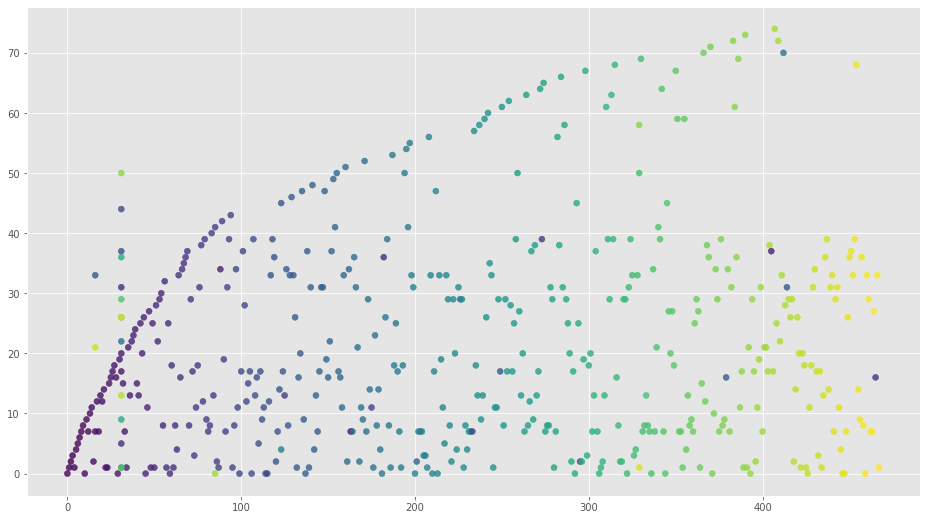

In [283]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.8)#ver: https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.show()

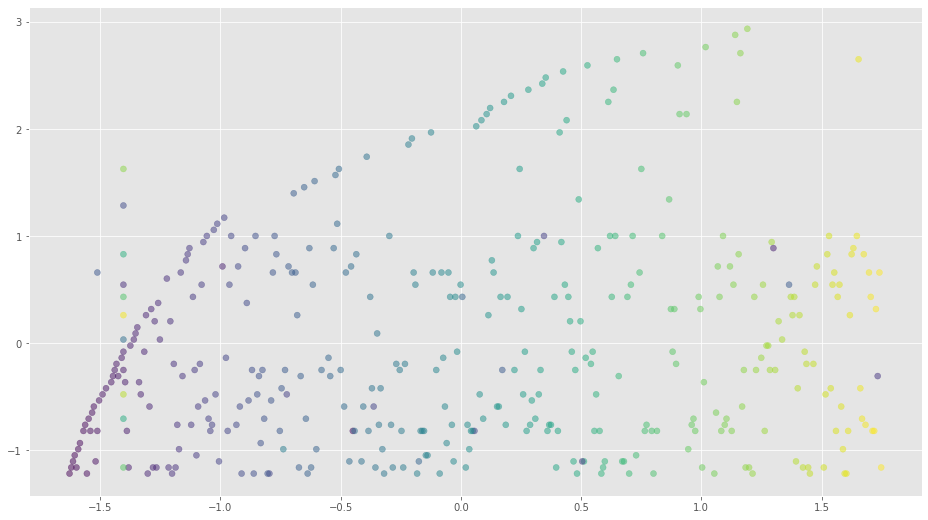

In [284]:
plt.figure()
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,alpha=0.5)#ver: https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.show()

In [301]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']
#lineal
#Kernel=0
#msv = svm.SVC(kernel=kernels[Kernel],decision_function_shape='ovo')

#polinomial cuadrático
#Kernel=1
#msv = svm.SVC(kernel=kernels[Kernel],degree=2,coef0=1,decision_function_shape='ovr')

#polinomial cúbico
#Kernel=1
#msv = svm.SVC(kernel=kernels[Kernel],degree=3)
#rbf 
Kernel=1
msv = svm.SVC(kernel=kernels[Kernel],decision_function_shape='ovo',gamma=(1/2)*100)
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

msv.fit(X_train, y_train)

SVC(decision_function_shape='ovo', gamma=50.0, kernel='poly')

In [ ]:
pred = msv.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

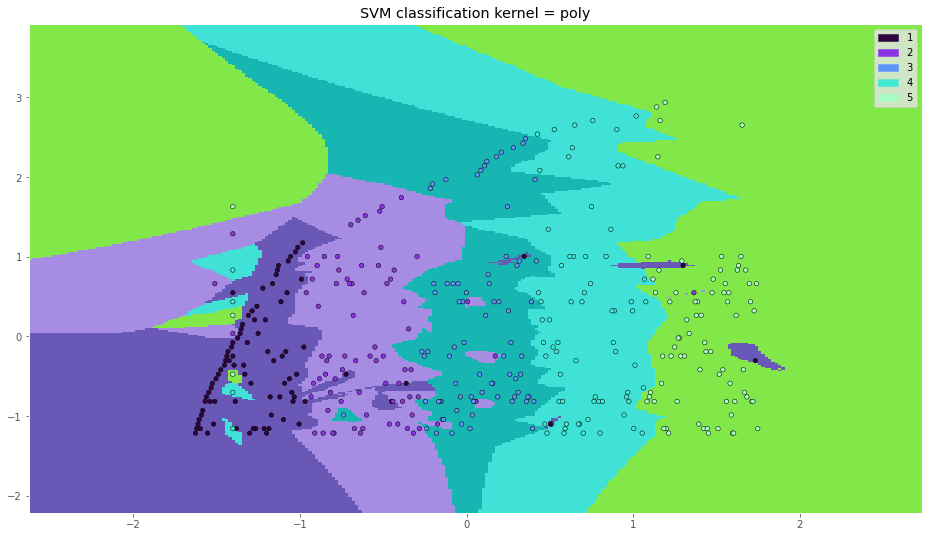

In [302]:
X=X_train
y=y_train

h = .02  # step size in the mesh
 
# Create color maps
cmap_light = ListedColormap(['#6958b5', '#a68ce3', '#18b6b2','#40e2d8','#82e748'])
cmap_bold = ListedColormap(['#2e0441', '#8c34e4','#5c95f8','#41e8d3','#a7fcc1'])
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = msv.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#2e0441', label='1')
patch1 = mpatches.Patch(color='#8c34e4', label='2')
patch2 = mpatches.Patch(color='#5c95f8', label='3')
patch3 = mpatches.Patch(color='#41e8d3', label='4')
patch4 = mpatches.Patch(color='#a7fcc1', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])
 
plt.title("SVM classification kernel = %s"% kernels[Kernel])
 
plt.show()

In [296]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']
Kernel=2
msv = svm.SVC(kernel=kernels[Kernel],decision_function_shape='ovo',gamma=(1/2)*100)

msv.fit(X_train, y_train)

SVC(decision_function_shape='ovo', gamma=50.0)

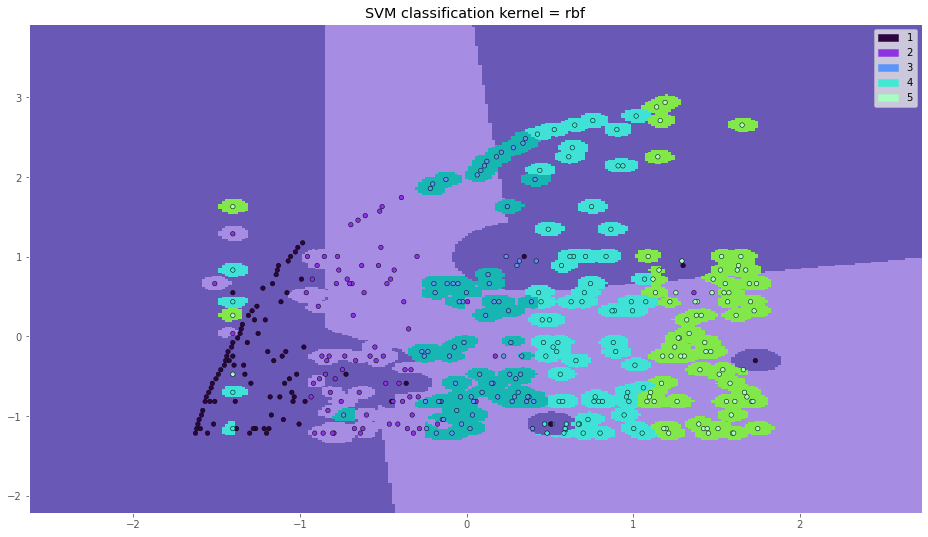

In [300]:
X=X_train
y=y_train

h = .02  # step size in the mesh
 
# Create color maps
cmap_light = ListedColormap(['#6958b5', '#a68ce3', '#18b6b2','#40e2d8','#82e748'])
cmap_bold = ListedColormap(['#2e0441', '#8c34e4','#5c95f8','#41e8d3','#a7fcc1'])
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = msv.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#2e0441', label='1')
patch1 = mpatches.Patch(color='#8c34e4', label='2')
patch2 = mpatches.Patch(color='#5c95f8', label='3')
patch3 = mpatches.Patch(color='#41e8d3', label='4')
patch4 = mpatches.Patch(color='#a7fcc1', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])
 
plt.title("SVM classification kernel = %s"% kernels[Kernel])
 
plt.show()

Se observa que usando kernel=poly se tiene una mucho mejor estimación, ya que por rbf los datos tienden a sobreentrenarse